### 1. Импорт библиотек и настройка

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.style.use("seaborn")

### 2. Выполнение лабораторной работы №2. Часть 1

#### Задание 1.

In [4]:
df1 = pd.read_csv("orders.csv")
df2 = pd.read_csv("products.csv")

df1.head(), df2.head(), 

(   OrderID   OrderDate  ProductID  UnitPrice  Quantity  Discount
 0    10248  2007-01-30         11      28.62        12       0.0
 1    10248  2007-01-30         42      14.04        10       0.0
 2    10248  2007-01-30         72      12.71         5       0.0
 3    10249  2006-01-29         14      22.80         9       0.0
 4    10249  2006-01-29         51     101.20        40       0.0,
    ProductID ProductName  QuantityPerUnit  UnitCost  UnitPrice CategoryName
 0          1       Банан               10     15.37       20.0       Фрукты
 1          2    Апельсин               10     16.17       19.0       Фрукты
 2          5      Яблоко              100      4.72        6.0       Фрукты
 3         11        Киви               25     21.10       28.0       Фрукты
 4         24     Абрикос              100      3.90        4.5       Фрукты)

In [10]:
df1.info, df2.info

(<bound method DataFrame.info of       OrderID   OrderDate  ProductID  UnitPrice  Quantity  Discount
 0       10248  2007-01-30         11      28.62        12      0.00
 1       10248  2007-01-30         42      14.04        10      0.00
 2       10248  2007-01-30         72      12.71         5      0.00
 3       10249  2006-01-29         14      22.80         9      0.00
 4       10249  2006-01-29         51     101.20        40      0.00
 ...       ...         ...        ...        ...       ...       ...
 2167    11083  2006-06-16         37       4.50         7      0.00
 2168    11083  2006-06-16         42      15.65        10      0.00
 2169    11083  2006-06-16         47      25.50         5      0.00
 2170    11083  2006-06-16         51      99.90         3      0.03
 2171    11083  2006-06-16         62      24.00         5      0.04
 
 [2172 rows x 6 columns]>,
 <bound method DataFrame.info of     ProductID   ProductName  QuantityPerUnit  UnitCost  UnitPrice CategoryName

In [18]:
df_joined = pd.merge(df1, df2, how="inner", on="ProductID")
df_joined.head()

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName
0,10248,2007-01-30,11,28.62,12,0.0,Киви,25,21.1,28.0,Фрукты
1,10296,2004-02-02,11,26.62,12,0.0,Киви,25,21.1,28.0,Фрукты
2,10327,2004-07-08,11,29.10,50,0.2,Киви,25,21.1,28.0,Фрукты
3,10353,2007-06-11,11,29.75,12,0.2,Киви,25,21.1,28.0,Фрукты
4,10365,2004-06-24,11,29.48,24,0.0,Киви,25,21.1,28.0,Фрукты


##### 1) Определите число уникальных продуктов в каждой категории

In [19]:
df_joined["CategoryName"].drop_duplicates()

0                    Фрукты
38               Мясо/Птица
69                    Овощи
107                   Крупы
130            Морепродукты
170                Приправы
288    Кондитерские изделия
848       Молочные продукты
Name: CategoryName, dtype: object

##### 2) Выведите все продукты в категории "Морепродукты"

In [20]:
df_joined[df_joined["CategoryName"] == 'Морепродукты']

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName
130,10249,2006-01-29,51,101.20,40,0.00,Мидии,10,82.74,99.9,Морепродукты
131,10250,2007-02-03,51,97.67,35,0.15,Мидии,10,82.74,99.9,Морепродукты
132,10291,2004-03-24,51,106.56,2,0.10,Мидии,10,82.74,99.9,Морепродукты
133,10335,2005-11-16,51,104.29,48,0.20,Мидии,10,82.74,99.9,Морепродукты
134,10362,2004-06-22,51,109.79,20,0.00,Мидии,10,82.74,99.9,Морепродукты
...,...,...,...,...,...,...,...,...,...,...,...
2167,10515,2004-12-18,9,42.05,16,0.15,Омары,10,32.90,39.0,Морепродукты
2168,10687,2006-04-26,9,41.17,50,0.25,Омары,10,32.90,39.0,Морепродукты
2169,10693,2006-05-02,9,35.30,6,0.00,Омары,10,32.90,39.0,Морепродукты
2170,10848,2007-06-21,9,40.32,3,0.00,Омары,10,32.90,39.0,Морепродукты


In [17]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 848
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          8 non-null      int64  
 1   OrderDate        8 non-null      object 
 2   ProductID        8 non-null      int64  
 3   UnitPrice_x      8 non-null      float64
 4   Quantity         8 non-null      int64  
 5   Discount         8 non-null      float64
 6   ProductName      8 non-null      object 
 7   QuantityPerUnit  8 non-null      int64  
 8   UnitCost         8 non-null      float64
 9   UnitPrice_y      8 non-null      float64
 10  CategoryName     8 non-null      object 
dtypes: float64(4), int64(4), object(3)
memory usage: 768.0+ bytes


##### 3) Выведите график числа заказов за каждый прошедший месяц.

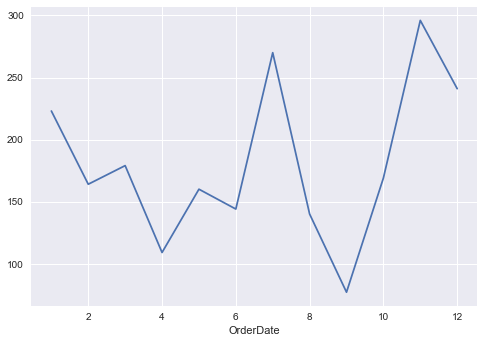

In [33]:
temp_df = df_joined.copy()
temp_df.index = date = pd.to_datetime(df_joined["OrderDate"])
temp_df.groupby(by=[temp_df.index.month])["Quantity"].count().plot();

In [36]:
df_joined.head()

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName
0,10248,2007-01-30,11,28.62,12,0.0,Киви,25,21.1,28.0,Фрукты
1,10296,2004-02-02,11,26.62,12,0.0,Киви,25,21.1,28.0,Фрукты
2,10327,2004-07-08,11,29.10,50,0.2,Киви,25,21.1,28.0,Фрукты
3,10353,2007-06-11,11,29.75,12,0.2,Киви,25,21.1,28.0,Фрукты
4,10365,2004-06-24,11,29.48,24,0.0,Киви,25,21.1,28.0,Фрукты


##### 4) Заведите столбец "OrderSum" (сколько было оплачено за продукт по заказу, с учётом его количества, стоимости единицы товара и скидки). Определите самые дорогие заказы (сгруппировав по OrderID)

In [46]:
# df_joined["OrderSum"] = df_joined["Quantity"] * df_joined["QuantityPerUnit"] * df_joined["UnitCost"]
df_joined["OrderSum"] = np.where(df_joined["Discount"] == 0.0, df_joined["Quantity"] * df_joined["QuantityPerUnit"] * df_joined["UnitPrice_x"],
                                df_joined["Quantity"] * df_joined["QuantityPerUnit"] * df_joined["UnitPrice_y"])
df_joined

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName,OrderSum
0,10248,2007-01-30,11,28.62,12,0.00,Киви,25,21.1,28.0,Фрукты,8586.0
1,10296,2004-02-02,11,26.62,12,0.00,Киви,25,21.1,28.0,Фрукты,7986.0
2,10327,2004-07-08,11,29.10,50,0.20,Киви,25,21.1,28.0,Фрукты,35000.0
3,10353,2007-06-11,11,29.75,12,0.20,Киви,25,21.1,28.0,Фрукты,8400.0
4,10365,2004-06-24,11,29.48,24,0.00,Киви,25,21.1,28.0,Фрукты,17688.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2167,10515,2004-12-18,9,42.05,16,0.15,Омары,10,32.9,39.0,Морепродукты,6240.0
2168,10687,2006-04-26,9,41.17,50,0.25,Омары,10,32.9,39.0,Морепродукты,19500.0
2169,10693,2006-05-02,9,35.30,6,0.00,Омары,10,32.9,39.0,Морепродукты,2118.0
2170,10848,2007-06-21,9,40.32,3,0.00,Омары,10,32.9,39.0,Морепродукты,1209.6


##### 5) Определите продукты с максимальной стоимостью за шт. (не за единицу товара)

In [34]:
df_joined.groupby(by="ProductName")["UnitCost"].max()

ProductName
Абрикос                   3.90
Ананас                   24.98
Апельсин                 16.17
Бадьян                   37.17
Баклажан                 62.38
                         ...  
Чеснок                    8.68
Чупа-Чупс                 6.69
Шоколад Молочное Чудо    25.39
Шоколад Снежинка         22.24
Яблоко                    4.72
Name: UnitCost, Length: 77, dtype: float64

#### Задание 2.

##### 1) Для каждой категории продуктов выведите средний доход от продаж. (OrderSum)

In [44]:
df_joined.groupby(by="CategoryName")["OrderSum"].mean()

CategoryName
Кондитерские изделия     7960.650463
Крупы                   15371.150816
Молочные продукты        2531.016475
Морепродукты            14033.045478
Мясо/Птица               9297.006482
Овощи                    8569.916817
Приправы                 4915.506321
Фрукты                   5735.712845
Name: OrderSum, dtype: float64

##### 2) Введите столбец "Profit" - разность между доходами и приблизительной закупочной стоимостью проданных товаров.

In [49]:
df_joined["Profit"] = df_joined["OrderSum"] - df_joined["Quantity"] * df_joined["QuantityPerUnit"] * df_joined["UnitCost"]
df_joined

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName,OrderSum,Profit
0,10248,2007-01-30,11,28.62,12,0.00,Киви,25,21.1,28.0,Фрукты,8586.0,2256.0
1,10296,2004-02-02,11,26.62,12,0.00,Киви,25,21.1,28.0,Фрукты,7986.0,1656.0
2,10327,2004-07-08,11,29.10,50,0.20,Киви,25,21.1,28.0,Фрукты,35000.0,8625.0
3,10353,2007-06-11,11,29.75,12,0.20,Киви,25,21.1,28.0,Фрукты,8400.0,2070.0
4,10365,2004-06-24,11,29.48,24,0.00,Киви,25,21.1,28.0,Фрукты,17688.0,5028.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,10515,2004-12-18,9,42.05,16,0.15,Омары,10,32.9,39.0,Морепродукты,6240.0,976.0
2168,10687,2006-04-26,9,41.17,50,0.25,Омары,10,32.9,39.0,Морепродукты,19500.0,3050.0
2169,10693,2006-05-02,9,35.30,6,0.00,Омары,10,32.9,39.0,Морепродукты,2118.0,144.0
2170,10848,2007-06-21,9,40.32,3,0.00,Омары,10,32.9,39.0,Морепродукты,1209.6,222.6


##### 3) Найдите по убыванию суммарной прибыли категории товаров, обеспечивающие  её 80 процентов. Выведите аналогичные данные только за 2005 и 2006 год.

In [53]:
df_joined["CategoryName"].unique()

array(['Фрукты', 'Мясо/Птица', 'Овощи', 'Крупы', 'Морепродукты',
       'Приправы', 'Кондитерские изделия', 'Молочные продукты'],
      dtype=object)

In [61]:
df_joined.groupby(by="CategoryName")["Profit"].sum() 

CategoryName
Кондитерские изделия    930348.57
Крупы                   294083.42
Молочные продукты        72855.99
Морепродукты            464952.45
Мясо/Птица              300192.76
Овощи                   729903.47
Приправы                360440.88
Фрукты                  415682.58
Name: Profit, dtype: float64

In [62]:
summed = df_joined["Profit"].sum()
summed

3568460.1199999996

In [64]:
new_df = df_joined.groupby(by="CategoryName")["Profit"].sum() / df_joined["Profit"].sum()
new_df

CategoryName
Кондитерские изделия    0.260714
Крупы                   0.082412
Молочные продукты       0.020417
Морепродукты            0.130295
Мясо/Птица              0.084124
Овощи                   0.204543
Приправы                0.101007
Фрукты                  0.116488
Name: Profit, dtype: float64

In [68]:
new_df.sort_values()

CategoryName
Молочные продукты       0.020417
Крупы                   0.082412
Мясо/Птица              0.084124
Приправы                0.101007
Фрукты                  0.116488
Морепродукты            0.130295
Овощи                   0.204543
Кондитерские изделия    0.260714
Name: Profit, dtype: float64

#### Задание 3.

##### 1) Разбейте датасет на тренировочную, валидационную и тестовую выборку

In [94]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [95]:
train_validation, test = train_test_split(df, test_size = 0.2)
train_validation.shape, test.shape

((16512, 10), (4128, 10))

In [96]:
train, validation = train_test_split(train_validation, test_size = 0.2)
train.shape, validation.shape

((13209, 10), (3303, 10))

##### 2) Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку


In [97]:
df_dummy = pd.get_dummies(df, columns=["ocean_proximity"])
df_dummy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


##### 3) Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).

In [98]:
df["total_rooms"] /= df["households"]
df["total_bedrooms"] /= df["households"]

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.984127,1.023810,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,6.238137,0.971880,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,8.288136,1.073446,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,5.817352,1.073059,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,6.281853,1.081081,565.0,259.0,3.8462,342200.0,NEAR BAY


##### 4) В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения. Определите число экземпляров данных, для которых этот признак отсутствует. Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче. Заполните пропуски.

In [99]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [100]:
df["total_bedrooms"].fillna(value=df["total_bedrooms"].mean(), inplace=True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

##### 5) Нормализуйте признаки longitude и latitude (сделайте так, чтобы каждый признак имел среднее значение 0 и дисперсию 1 внутри обучающей выборки)

In [101]:
train["longitude"] = (train["longitude"] - train["longitude"].mean()) / train["longitude"].std()
train["latitude"] = (train["latitude"] - train["latitude"].mean()) / train["latitude"].std()

<ipython-input-101-46dbc7980d7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["longitude"] = (train["longitude"] - train["longitude"].mean()) / train["longitude"].std()
<ipython-input-101-46dbc7980d7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["latitude"] = (train["latitude"] - train["latitude"].mean()) / train["latitude"].std()


In [102]:
train["longitude"].mean(), train["longitude"].std(), train["latitude"].mean(), train["latitude"].std()

(-2.642593666539549e-14,
 1.0000000000000018,
 4.756576522450916e-14,
 0.9999999999999911)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327803,1.052523,41.0,6.984127,1.023810,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-1.322812,1.043159,21.0,6.238137,0.971880,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-1.332794,1.038478,52.0,8.288136,1.073446,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-1.337785,1.038478,52.0,5.817352,1.073059,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-1.337785,1.038478,52.0,6.281853,1.081081,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758808,1.801603,25.0,5.045455,1.133333,845.0,330.0,1.5603,78100.0,INLAND
20636,-0.818702,1.806285,18.0,6.114035,1.315789,356.0,114.0,2.5568,77100.0,INLAND
20637,-0.823693,1.778194,17.0,5.205543,1.120092,1007.0,433.0,1.7000,92300.0,INLAND
20638,-0.873605,1.778194,18.0,5.329513,1.171920,741.0,349.0,1.8672,84700.0,INLAND


### 3. Выполнение лабораторной работы №2. Часть 2

#### Задание 1.

In [25]:
df = pd.read_csv("Davis.csv")
df.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [26]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


##### 1) Удалите некорректные данные

In [27]:
df.isna().sum() / len(df) * 100

sex       0.0
weight    0.0
height    0.0
repwt     8.5
repht     8.5
dtype: float64

In [28]:
df.dropna(inplace=True)
df.isna().sum() / len(df) * 100

sex       0.0
weight    0.0
height    0.0
repwt     0.0
repht     0.0
dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     181 non-null    object 
 1   weight  181 non-null    int64  
 2   height  181 non-null    int64  
 3   repwt   181 non-null    float64
 4   repht   181 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 8.5+ KB


##### 2) Выделите тестовую выборку из 50 экземпляров

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train, test = train_test_split(df, test_size=50)
train.shape, test.shape

((131, 5), (50, 5))

##### 3) На тренировочных данных постройте: Гистограмму height, Гистограмму weight, Эти же гистограммы для разных полов

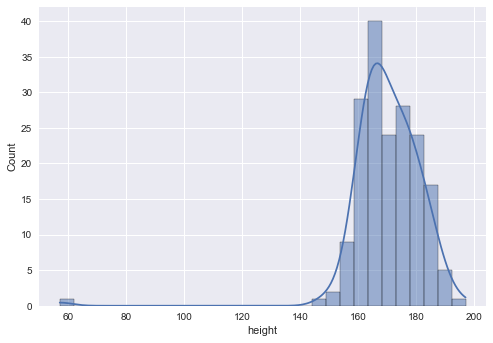

In [16]:
sns.histplot(df["height"], kde = True);

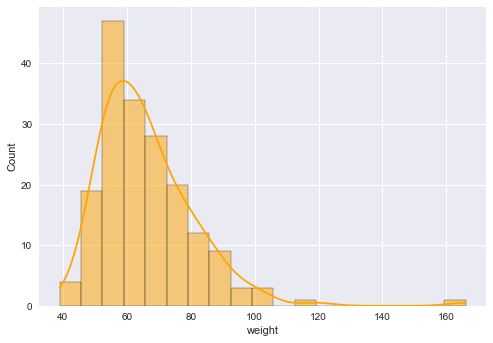

In [18]:
sns.histplot(df["weight"], kde = True, color = "orange");

In [6]:
df_men = df[df["sex"] == 'M']
df_women = df[df["sex"] == 'F']

df_men.head(), df_women.head()

(  sex  weight  height  repwt  repht
 0   M      77     182   77.0  180.0
 3   M      68     177   70.0  175.0
 5   M      76     170   76.0  165.0
 6   M      76     167   77.0  165.0
 7   M      69     186   73.0  180.0,
    sex  weight  height  repwt  repht
 1    F      58     161   51.0  159.0
 2    F      53     161   54.0  158.0
 4    F      59     157   59.0  155.0
 11   F     166      57   56.0  163.0
 12   F      51     161   52.0  158.0)

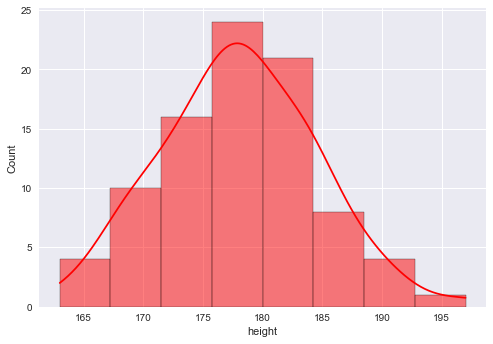

In [9]:
sns.histplot(df_men['height'], kde = True, color = "red");

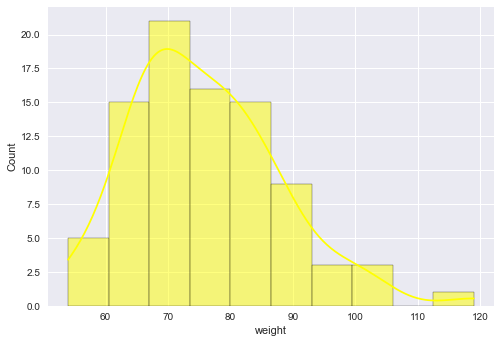

In [11]:
sns.histplot(df_men["weight"], kde = True, color = "yellow");

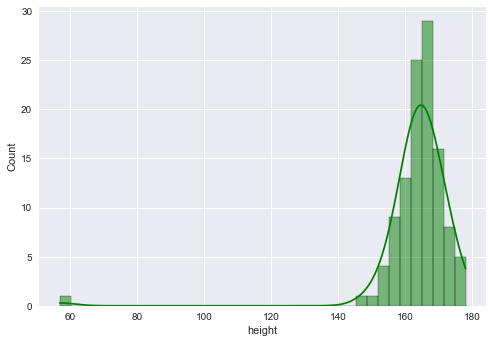

In [13]:
sns.histplot(df_women["height"], kde = True, color = "green");

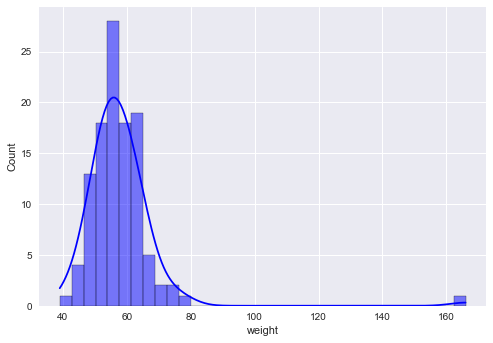

In [14]:
sns.histplot(df_women["weight"], kde = True, color = "blue");

##### 4) На тренировочных данных обучите классификатор пола (sex), используя только признаки height и weight. Замерьте производительность на тренировочной и тестовой выборке (через Accuracy). Рекомендуемые модели:  логистическая регрессия, quadratic discriminant analysis.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
train.replace({'M': 0, 'F': 1}, inplace=True)
test.replace({'M': 0, 'F': 1}, inplace=True)

train.head(), test.head()

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


(    sex  weight  height  repwt  repht
 27    1      58     166   60.0  160.0
 26    1      63     169   61.0  168.0
 1     1      58     161   51.0  159.0
 87    1      53     165   53.0  165.0
 0     0      77     182   77.0  180.0,
      sex  weight  height  repwt  repht
 118    0      75     169   76.0  165.0
 29     0     101     183  100.0  180.0
 190    0      88     185   93.0  188.0
 86     0      62     178   66.0  175.0
 94     0      88     189   87.0  185.0)

In [39]:
y_train = train["sex"].to_numpy()
X_train = train.loc[:, ["height", "weight"]].to_numpy()

In [40]:
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_train, y_train) # Обучающая выборка

0.8854961832061069

In [41]:
y_test = test["sex"].to_numpy()
X_test = test.loc[:, ["height", "weight"]].to_numpy()
predictions = clf.predict(X_test) # Тестовая выборка

In [42]:
accuracy_score(predictions, y_test)

0.92

#### Задание 2.

##### 1) Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.

In [86]:
df = pd.read_excel("Folds5x2_pp.xlsx", sheet_name = "Sheet1")

df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [87]:
train_validation, test = train_test_split(df, test_size = 0.2)
train, validation = train_test_split(train_validation, test_size = 0.2)

train.shape, validation.shape, test.shape

((6123, 5), (1531, 5), (1914, 5))

##### 2) Постройте регрессионную модель.  Замерьте коэффициент R^2 и среднюю ошибку предсказания на валидационной выборке.

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [89]:
y_train = train["PE"].to_numpy()
X_train = train.drop(["PE"], axis=1).to_numpy()

y_val = validation["PE"].to_numpy()
X_val = validation.drop(["PE"], axis=1).to_numpy()

y_test = test["PE"].to_numpy()
X_test = test.drop(["PE"], axis=1).to_numpy()

In [52]:
linear = LinearRegression().fit(X_train, y_train)
print(linear.score(X_val, y_val)) # R^2

predictions_val = linear.predict(X_val)
mean_squared_error(predictions_val, y_val) # MSE

0.9294857166600029


19.8733394091585

##### 3) Постройте точки из валидационной выборки на плоскости (t=истинное значение, y=предсказание модели). Отобразите вместе с ними прямую y=t. 

In [66]:
k, b = np.polyfit(y_val, predictions_val, 1)

Text(0, 0.5, 'Оценка')

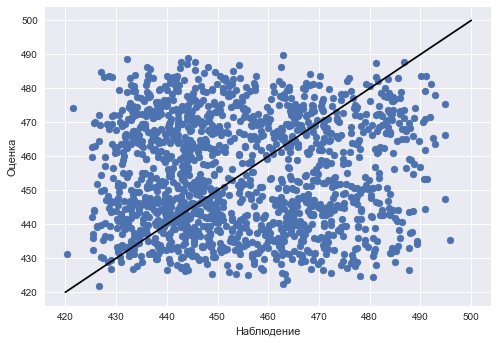

In [93]:
plt.scatter(y_val, predictions_val)
f = lambda x: x
x = np.linspace(420, 500,5)
plt.plot(x, f(x), color = 'k')
plt.xlabel("Наблюдение")
plt.ylabel("Оценка")